# "TuneTrends"
## A Comprehensive Study on Regression, Classification, and Recommendations in Spotify Music

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
#Load Dataset
df=pd.read_csv("spotify_songs.csv")

In [306]:
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [307]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [309]:
#Finding the number of missing data
df.isnull().sum() 

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [310]:
#Deleting the records with missing data
df=df.dropna()

In [311]:
#Cleaned data
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [312]:
#Cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudne

In [313]:
#pd.DataFrame({'Values': df.nunique()})

In [314]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])
df['track_album_release_year'] = df['track_album_release_date'].dt.year
df = df.drop(columns=['track_album_release_date'])

In [1]:
#Consolidate the entire pre-process into one function
def preprocess(data):
    
    #Remove the missing values
    data=data.dropna()
    
    #dropping the ‘track_id’, ‘track_album_id’ and ‘playlist_id’ columns
    data=data.drop(['track_id','playlist_id','track_album_id'],axis=1)
    
    #Extracting only the year column from the 'track_album_release_date'
    data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])
    data['track_album_release_year'] = data['track_album_release_date'].dt.year
    data = data.drop(columns=['track_album_release_date'])
    
    #Removing Duplicates on the basis of popularity
    data = data.sort_values(by=['track_popularity'], ascending=False)
    data.drop_duplicates(subset=['track_name'], keep='first', inplace=True)
    
    return data

# Exploratory Data Analysis

In [316]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
df_eda = pd.read_csv("spotify_songs.csv")
df_eda = preprocess(df_eda)
df_eda.head()

track_name    track_artist  track_popularity  \
20091  Dance Monkey     Tones and I               100   
23104       ROXANNE  Arizona Zervas                99   
23109       Circles     Post Malone                98   
21384       The Box     Roddy Ricch                98   
23107      Memories        Maroon 5                98   

                                  track_album_name  \
20091  Dance Monkey (Stripped Back) / Dance Monkey   
23104                                      ROXANNE   
23109                         Hollywood's Bleeding   
21384        Please Excuse Me For Being Antisocial   
23107                                     Memories   

                                           playlist_name playlist_genre  \
20091                          Global Top 50 | 2020 Hits          latin   
23104  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
23109  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
21384                                New Hip Hop‏‏​​   ‍            r&b   
23107  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   

        playlist_subgenre  danceability  energy  key  loudness  mode  \
20091       latin hip hop         0.824   0.588    6    -6.400     0   
23104             hip pop         0.621   0.601    6    -5.616     0   
23109             hip pop         0.695   0.762    0    -3.497     1   
21384  urban contemporary         0.896   0.586   10    -6.687     0   
23107             hip pop         0.764   0.320   11    -7.209     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20091       0.0924        0.6920          0.000104    0.1490    0.513   
23104       0.1480        0.0522          0.000000    0.4600    0.457   
23109       0.0395        0.1920          0.002440    0.0863    0.553   
21384       0.0559        0.1040          0.000000    0.7900    0.642   
23107       0.0546        0.8370          0.000000    0.0822    0.575   

         tempo  duration_ms  track_album_release_year  
20091   98.027       209438                      2019  
23104  116.735       163636                      2019  
23109  120.042       215280                      2019  
21384  116.971       196653                      2019  
23107   91.019       189486                      2019

<AxesSubplot:>

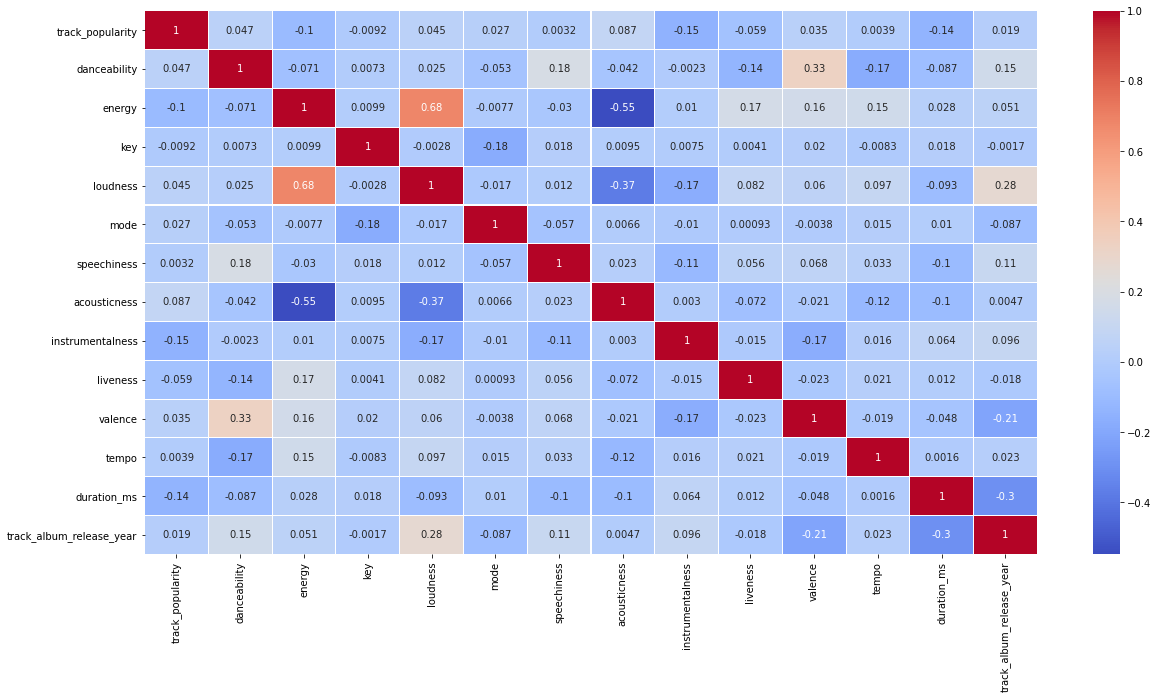

In [318]:
#correlation calculation
plt.figure(figsize=(20,10))
df_corr = df_eda.corr()
sns.heatmap(data=df_corr,cmap='coolwarm',cbar=True,annot=True,linewidths=0.1)

Text(0.5, 1.0, 'Number of tracks albums released per year')

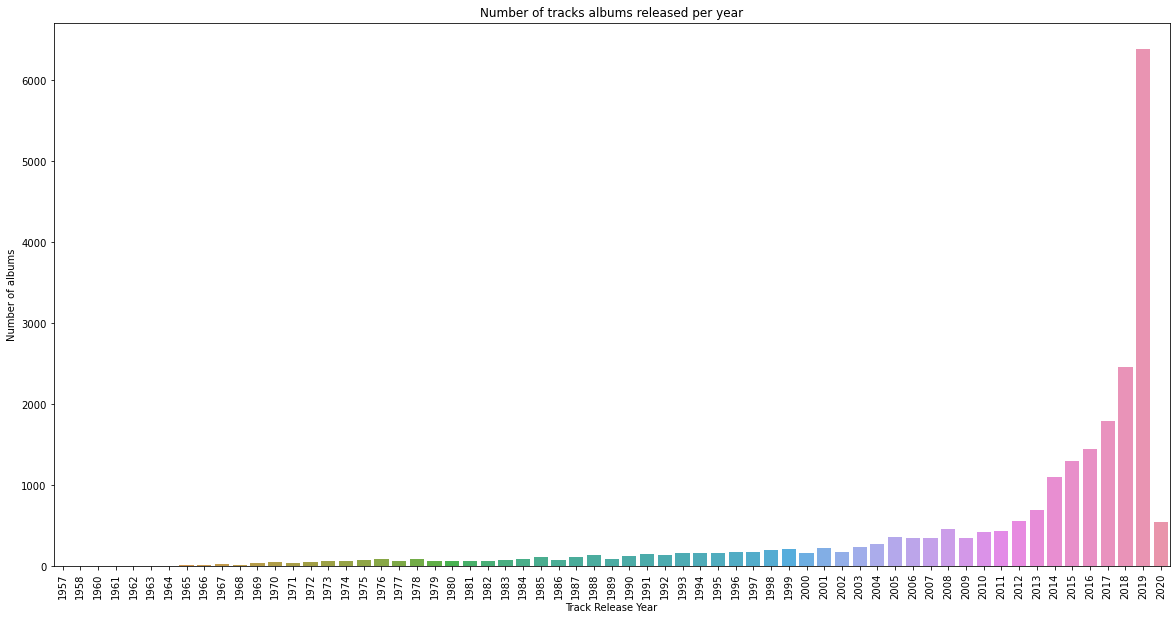

In [319]:
plt.figure(figsize=(20,10))
sns.countplot(x='track_album_release_year', data=df_eda)
plt.xticks(rotation=90)
plt.xlabel("Track Release Year")
plt.ylabel("Number of albums")
plt.title('Number of tracks albums released per year')

<AxesSubplot:xlabel='track_album_release_year', ylabel='duration_ms'>

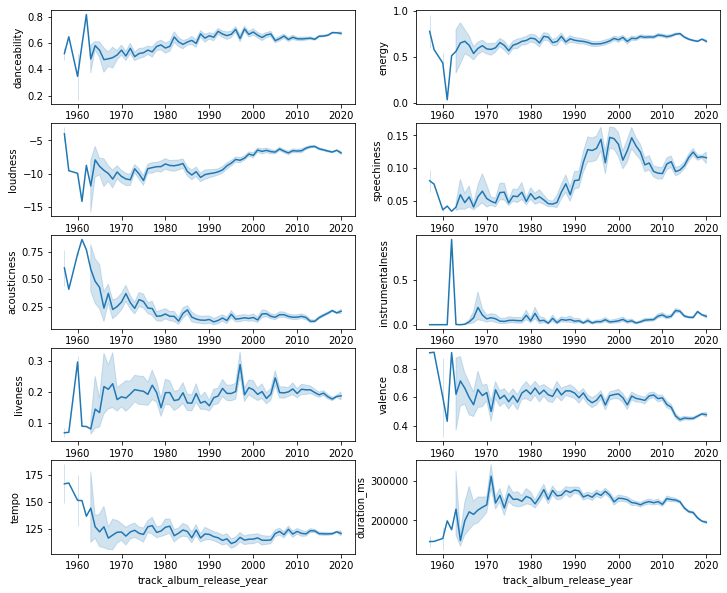

In [320]:
fig, axes = plt.subplots(5,2, figsize=(12,10))
sns.lineplot(data=df_eda, x="track_album_release_year",y="danceability", ax=axes[0,0])
sns.lineplot(data=df_eda, x="track_album_release_year",y="energy", ax=axes[0,1])
sns.lineplot(data=df_eda, x="track_album_release_year",y="loudness", ax=axes[1,0])
sns.lineplot(data=df_eda, x="track_album_release_year",y="speechiness", ax=axes[1,1])
sns.lineplot(data=df_eda, x="track_album_release_year",y="acousticness", ax=axes[2,0])
sns.lineplot(data=df_eda, x="track_album_release_year",y="instrumentalness", ax=axes[2,1])
sns.lineplot(data=df_eda, x="track_album_release_year",y="liveness", ax=axes[3,0])
sns.lineplot(data=df_eda, x="track_album_release_year",y="valence", ax=axes[3,1])
sns.lineplot(data=df_eda, x="track_album_release_year",y="tempo", ax=axes[4,0])
sns.lineplot(data=df_eda, x="track_album_release_year",y="duration_ms", ax=axes[4,1])

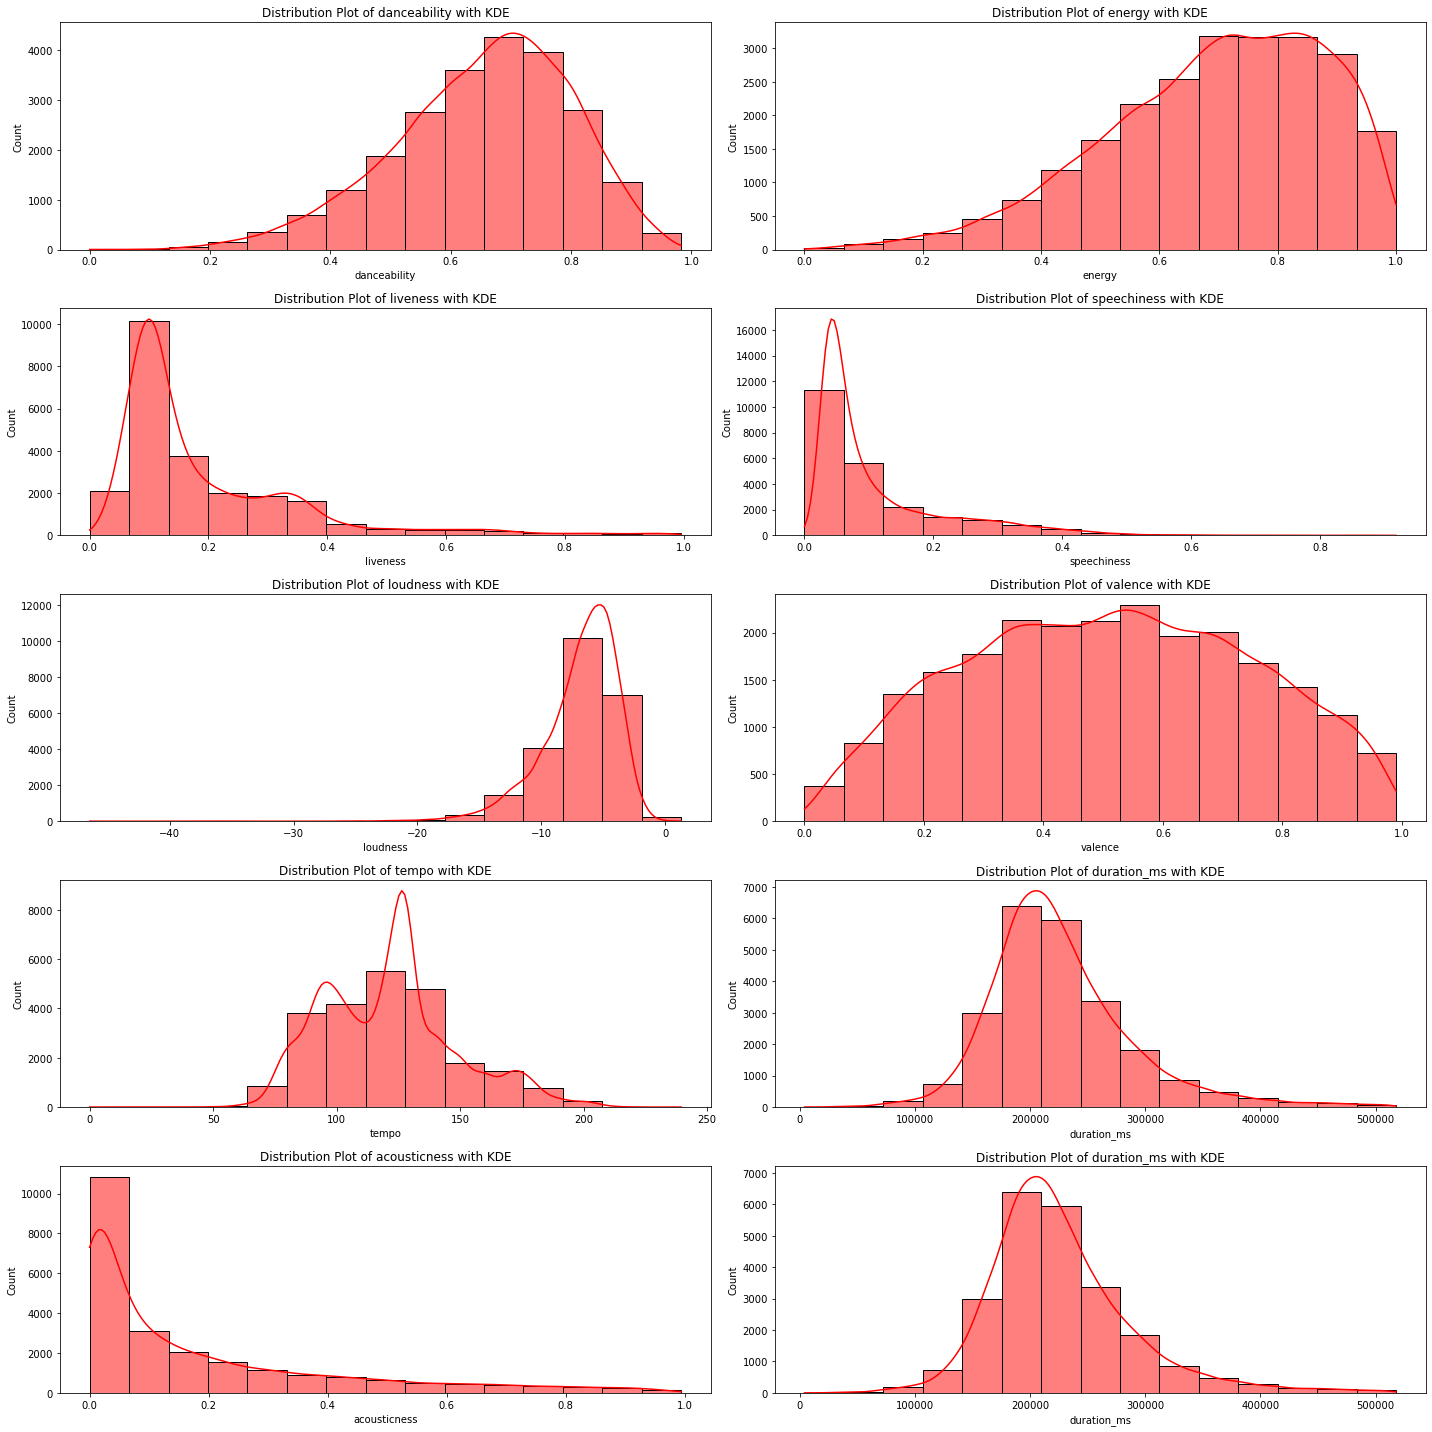

In [321]:
cols = ['danceability', 'energy', 'liveness', 'speechiness', 'loudness', 'valence', 'tempo', 'duration_ms', 'acousticness','duration_ms']
plt.figure(figsize=(20, 20))
for i, col in enumerate(cols, 1):
    plt.subplot(5,2,i)
    sns.histplot(df_eda[col], color='red', kde=True, bins=15, )
    plt.title(f'Distribution Plot of {col} with KDE')
plt.tight_layout()
plt.show()

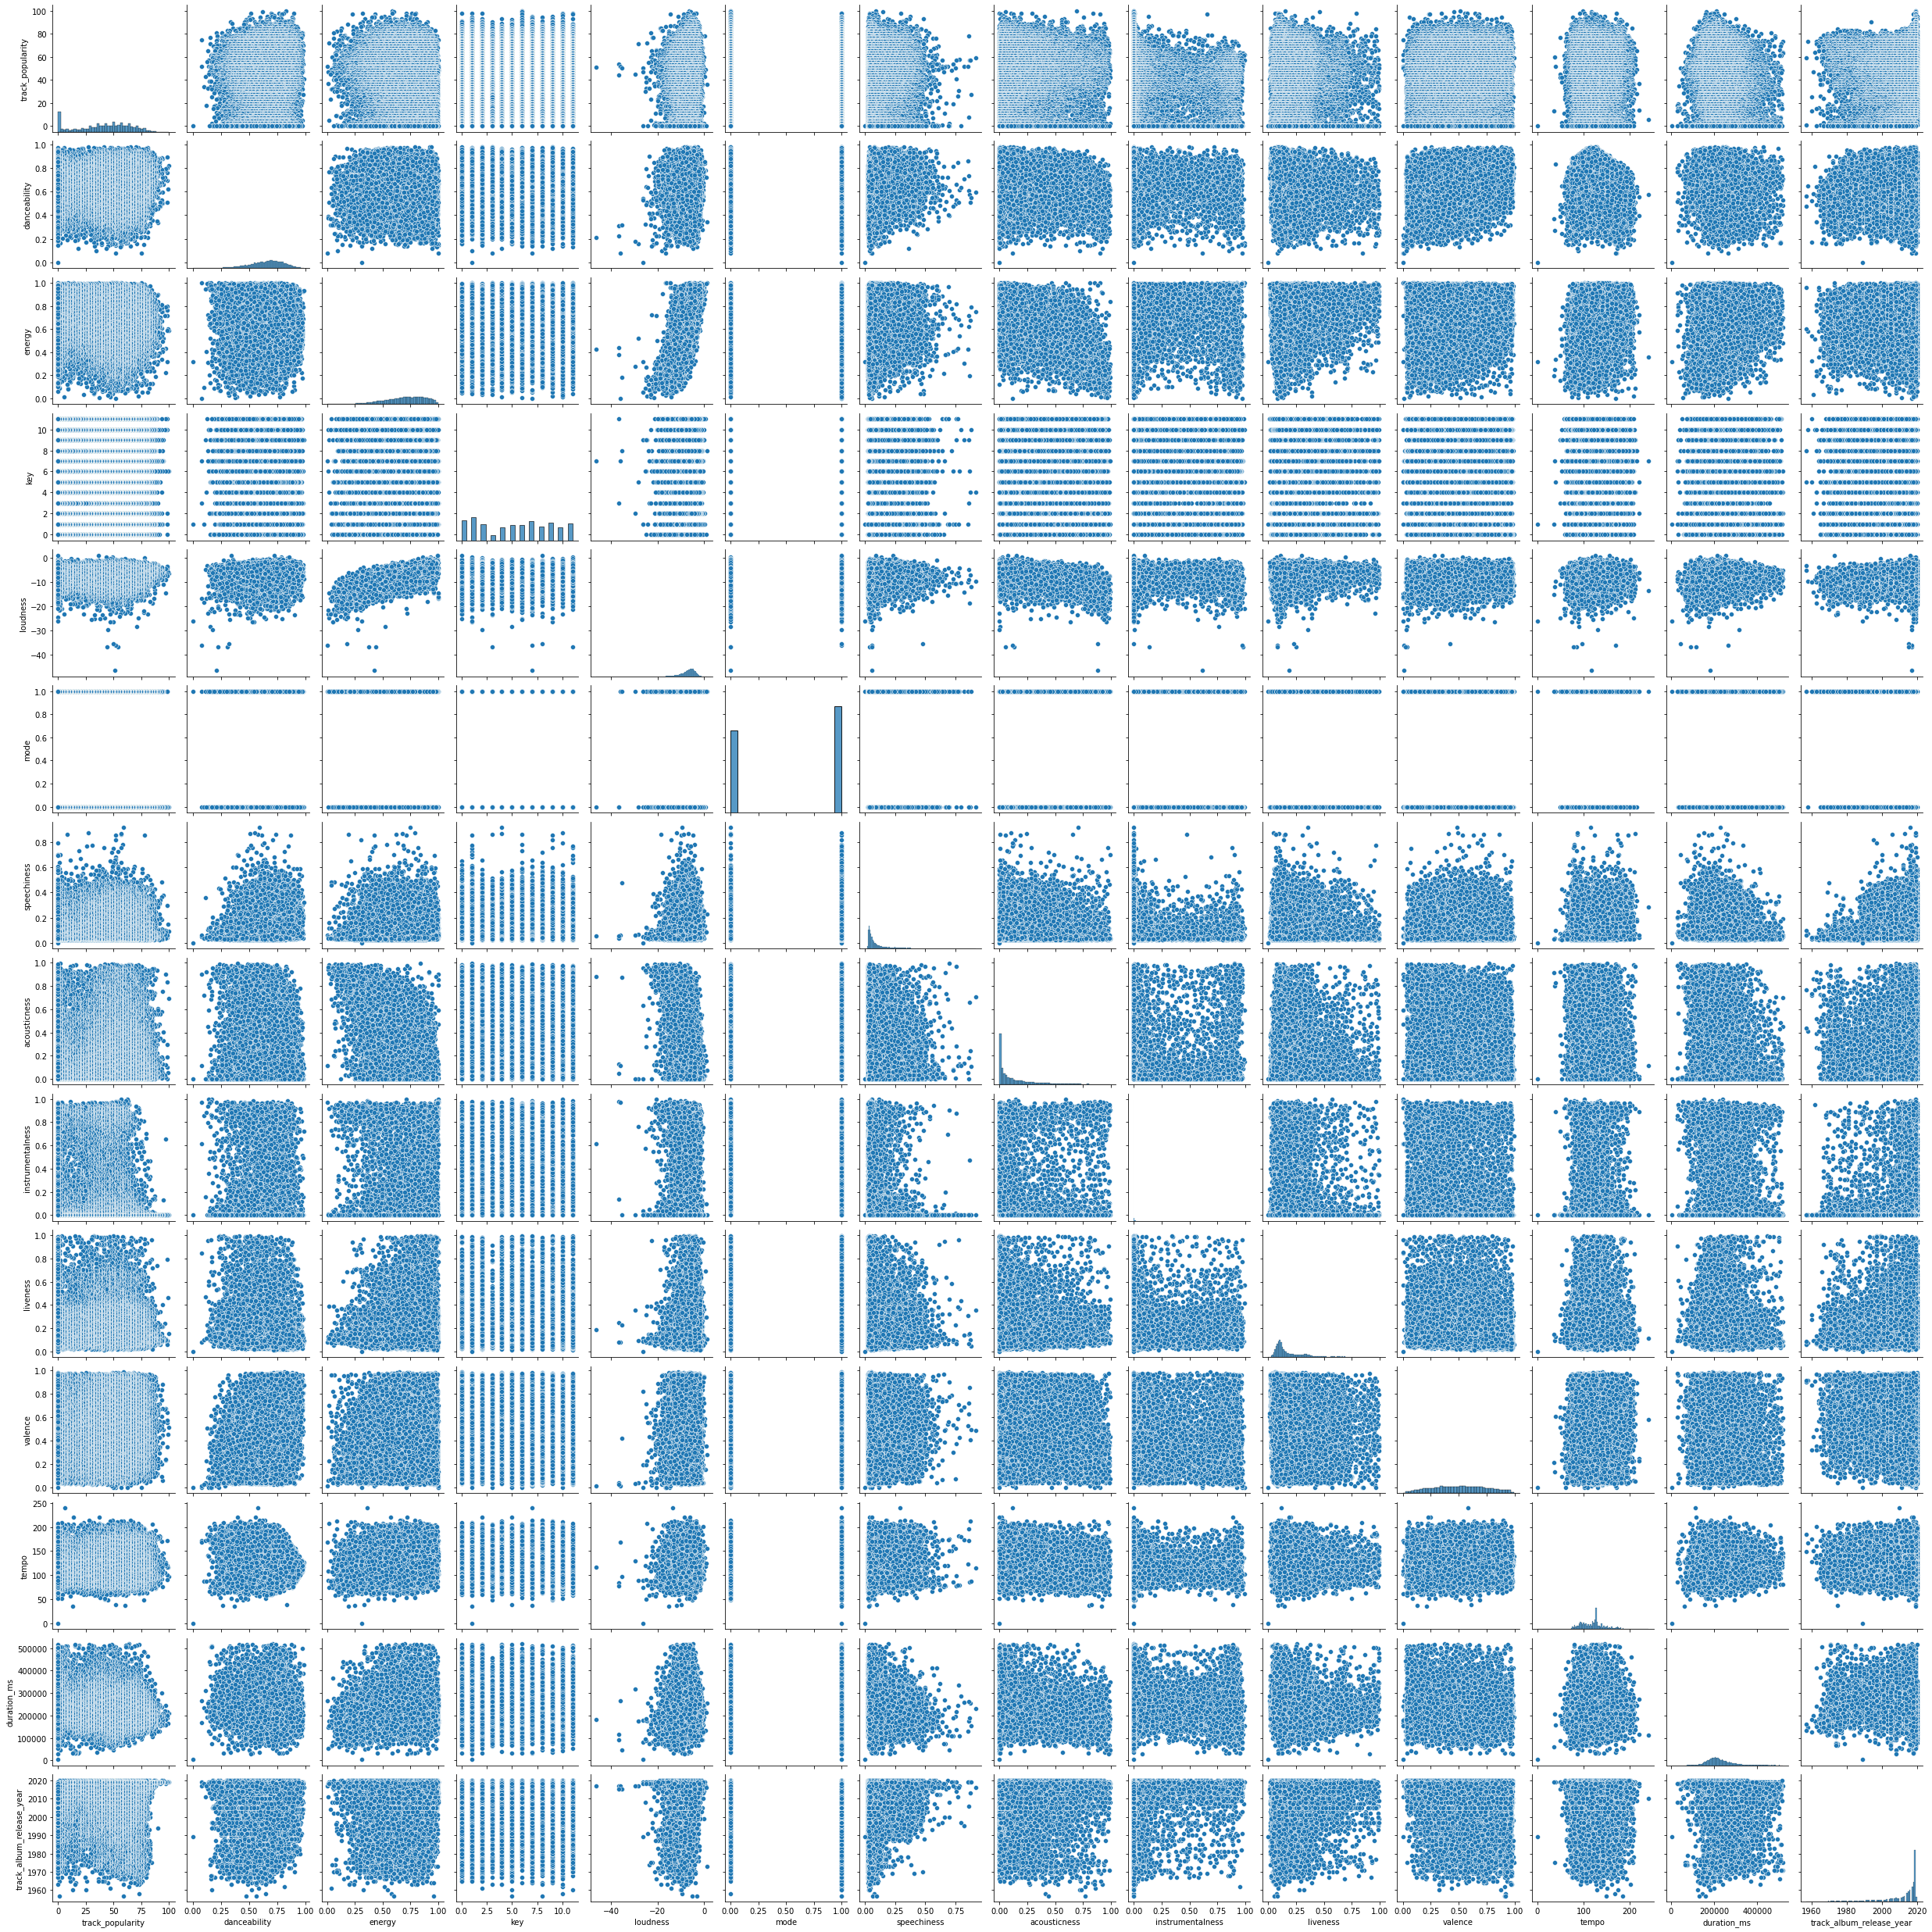

In [138]:
sns.pairplot(df_eda)
plt.savefig('pairplot.jpg')

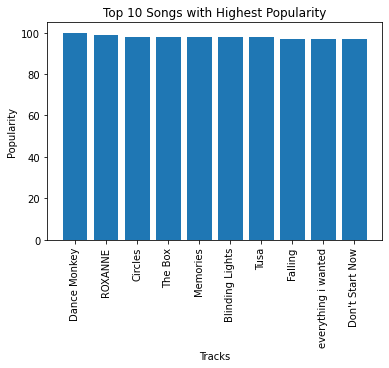

In [322]:
top_10_songs = df_eda.sort_values(by='track_popularity', ascending=False).head(10)
plt.bar(top_10_songs['track_name'], top_10_songs['track_popularity'])
plt.xlabel('Tracks')
plt.ylabel('Popularity')
plt.title('Top 10 Songs with Highest Popularity')
plt.xticks(rotation=90)
plt.show()

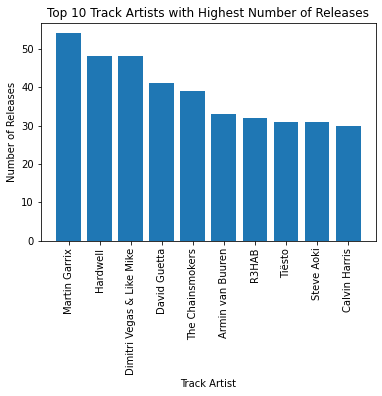

In [323]:
artist_counts = df_eda.groupby('track_artist')['track_album_name'].nunique()
top_10_artists = artist_counts.sort_values(ascending=False).head(10)
plt.bar(top_10_artists.index, top_10_artists.values)
plt.xlabel('Track Artist')
plt.ylabel('Number of Releases')
plt.title('Top 10 Track Artists with Highest Number of Releases')
plt.xticks(rotation=90)
plt.show()

# Multi-linear-Regression

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [4]:
df_reg = pd.read_csv("spotify_songs.csv")
df_reg = preprocess(df_reg)
df_embed = pd.read_csv("BERT_embeddings_dataframe.csv")

In [326]:
df_reg.head()

track_name    track_artist  track_popularity  \
20091  Dance Monkey     Tones and I               100   
23104       ROXANNE  Arizona Zervas                99   
23109       Circles     Post Malone                98   
21384       The Box     Roddy Ricch                98   
23107      Memories        Maroon 5                98   

                                  track_album_name  \
20091  Dance Monkey (Stripped Back) / Dance Monkey   
23104                                      ROXANNE   
23109                         Hollywood's Bleeding   
21384        Please Excuse Me For Being Antisocial   
23107                                     Memories   

                                           playlist_name playlist_genre  \
20091                          Global Top 50 | 2020 Hits          latin   
23104  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
23109  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
21384                                New Hip Hop‏‏​​   ‍            r&b   
23107  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   

        playlist_subgenre  danceability  energy  key  loudness  mode  \
20091       latin hip hop         0.824   0.588    6    -6.400     0   
23104             hip pop         0.621   0.601    6    -5.616     0   
23109             hip pop         0.695   0.762    0    -3.497     1   
21384  urban contemporary         0.896   0.586   10    -6.687     0   
23107             hip pop         0.764   0.320   11    -7.209     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20091       0.0924        0.6920          0.000104    0.1490    0.513   
23104       0.1480        0.0522          0.000000    0.4600    0.457   
23109       0.0395        0.1920          0.002440    0.0863    0.553   
21384       0.0559        0.1040          0.000000    0.7900    0.642   
23107       0.0546        0.8370          0.000000    0.0822    0.575   

         tempo  duration_ms  track_album_release_year  
20091   98.027       209438                      2019  
23104  116.735       163636                      2019  
23109  120.042       215280                      2019  
21384  116.971       196653                      2019  
23107   91.019       189486                      2019

In [327]:
#Removing unwanted columns
df_reg=df_reg.drop(['track_name','track_artist','track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre','track_album_release_year'],axis=1)

In [328]:
X=df_reg.drop(["valence"],axis=1)
Y=df_reg["valence"]

In [329]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [330]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [333]:
Y_pred = regressor.predict(X_test)

In [334]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 Score: "+str(r2_score(Y_test,Y_pred)))
print("Mean Squared Error: "+str(mean_squared_error(Y_test,Y_pred)))
print("Root Mean Squared Error: "+str(math.sqrt(mean_squared_error(Y_test,Y_pred))))

R2 Score: 0.19780946492519447
Mean Squared Error: 0.044968007138174164
Root Mean Squared Error: 0.21205661304985082


### Backward Elimination Implementation
The given ‘backward elimination’ technique is implemented using the ‘ordinary least squares (OLS)’ class and keeping significance level for P-value as 5% (0.05). Executing the given setup gave an OLS summary in which the P values for all the chosen features were way below the confidence level. Therefore, no explicit feature selection was required.

In [335]:
import statsmodels.api as sm
X = np.append(arr = np.ones((23449, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     520.0
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:27:15   Log-Likelihood:                 3437.7
No. Observations:               23449   AIC:                            -6849.
Df Residuals:                   23436   BIC:                            -6745.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3923      0.017    -22.744      0.000      -0.426      -0.359
x1             0.0002   6.06e-05      3.828      0.000       0.000       0.000
x2             0.6021      0.010     60.908      0.000       0.583       0.621
x3             0.5244      0.012     44.693      0.000       0.501       0.547
x4             0.0010      0.000      2.709      0.007       0.000       0.002
x5            -0.0168      0.001    -26.176      0.000      -0.018      -0.016
x6             0.0065      0.003      2.317      0.021       0.001       0.012
x7            -0.0323      0.014     -2.382      0.017      -0.059      -0.006
x8             0.1421      0.007     19.453      0.000       0.128       0.156
x9            -0.2076      0.006    -34.501      0.000      -0.219      -0.196
x10           -0.0207      0.009     -2.323      0.020      -0.038      -0.003
x11            0.0002    5.2e-05      4.321      0.000       0.000       0.000
x12        -7.151e-08   2.28e-08     -3.141      0.002   -1.16e-07   -2.69e-08
==============================================================================
Omnibus:                      425.354   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.595
Skew:                          -0.045   Prob(JB):                     9.39e-53
Kurtosis:                       2.513   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using BERT embeddings created for the categorical data.

In [339]:
df_reg_2 = pd.merge(df_reg, df_embed, left_index=True, right_index=True)

In [345]:
#df_reg_2.head()

In [343]:
#Removing unwanted columns
#df_reg_2=df_reg_2.drop(['track_name','track_artist','track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre','track_album_release_year'],axis=1)

In [346]:
X=df_reg_2.drop(["valence"],axis=1)
Y=df_reg_2["valence"]

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [348]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [349]:
Y_pred = regressor.predict(X_test)

In [350]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 Score: "+str(r2_score(Y_test,Y_pred)))
print("Mean Squared Error: "+str(mean_squared_error(Y_test,Y_pred)))
print("Root Mean Squared Error: "+str(math.sqrt(mean_squared_error(Y_test,Y_pred))))

R2 Score: 0.34528754755902136
Mean Squared Error: 0.03670089953388942
Root Mean Squared Error: 0.1915747883566348


# Classification Algorithms

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#!pip install xgboost

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [8]:
df_cla = pd.read_csv("spotify_songs.csv")
df_cla = preprocess(df_cla)

In [9]:
df_cla['valence'] = df_cla['valence'].apply(lambda x: 1 if x > 0.5 else 0)

In [10]:
df_cla.head()

track_name    track_artist  track_popularity  \
20091  Dance Monkey     Tones and I               100   
23104       ROXANNE  Arizona Zervas                99   
23109       Circles     Post Malone                98   
21384       The Box     Roddy Ricch                98   
23107      Memories        Maroon 5                98   

                                  track_album_name  \
20091  Dance Monkey (Stripped Back) / Dance Monkey   
23104                                      ROXANNE   
23109                         Hollywood's Bleeding   
21384        Please Excuse Me For Being Antisocial   
23107                                     Memories   

                                           playlist_name playlist_genre  \
20091                          Global Top 50 | 2020 Hits          latin   
23104  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
23109  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
21384                                New Hip Hop‏‏​​   ‍            r&b   
23107  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   

        playlist_subgenre  danceability  energy  key  loudness  mode  \
20091       latin hip hop         0.824   0.588    6    -6.400     0   
23104             hip pop         0.621   0.601    6    -5.616     0   
23109             hip pop         0.695   0.762    0    -3.497     1   
21384  urban contemporary         0.896   0.586   10    -6.687     0   
23107             hip pop         0.764   0.320   11    -7.209     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20091       0.0924        0.6920          0.000104    0.1490        1   
23104       0.1480        0.0522          0.000000    0.4600        0   
23109       0.0395        0.1920          0.002440    0.0863        1   
21384       0.0559        0.1040          0.000000    0.7900        1   
23107       0.0546        0.8370          0.000000    0.0822        1   

         tempo  duration_ms  track_album_release_year  
20091   98.027       209438                      2019  
23104  116.735       163636                      2019  
23109  120.042       215280                      2019  
21384  116.971       196653                      2019  
23107   91.019       189486                      2019

<Axes: xlabel='valence', ylabel='count'>

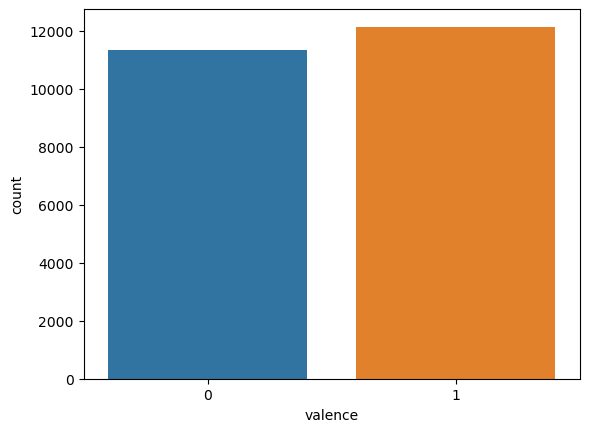

In [11]:
#Check for the balance of the 2 classes
sns.countplot(x='valence', data=df_cla)

In [12]:
#Exact count of the two classes
df_cla['valence'].value_counts()

1    12134
0    11315
Name: valence, dtype: int64

In [13]:
df_cla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 20091 to 19457
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                23449 non-null  object 
 1   track_artist              23449 non-null  object 
 2   track_popularity          23449 non-null  int64  
 3   track_album_name          23449 non-null  object 
 4   playlist_name             23449 non-null  object 
 5   playlist_genre            23449 non-null  object 
 6   playlist_subgenre         23449 non-null  object 
 7   danceability              23449 non-null  float64
 8   energy                    23449 non-null  float64
 9   key                       23449 non-null  int64  
 10  loudness                  23449 non-null  float64
 11  mode                      23449 non-null  int64  
 12  speechiness               23449 non-null  float64
 13  acousticness              23449 non-null  float64
 14  in

In [14]:
df_cla=df_cla.drop(['track_name','track_popularity','track_artist','track_album_name', 'playlist_name', 'playlist_genre', 'playlist_subgenre','track_album_release_year'],axis=1)

In [15]:
df_cla.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
20091         0.824   0.588    6    -6.400     0       0.0924        0.6920   
23104         0.621   0.601    6    -5.616     0       0.1480        0.0522   
23109         0.695   0.762    0    -3.497     1       0.0395        0.1920   
21384         0.896   0.586   10    -6.687     0       0.0559        0.1040   
23107         0.764   0.320   11    -7.209     1       0.0546        0.8370   

       instrumentalness  liveness  valence    tempo  duration_ms  
20091          0.000104    0.1490        1   98.027       209438  
23104          0.000000    0.4600        0  116.735       163636  
23109          0.002440    0.0863        1  120.042       215280  
21384          0.000000    0.7900        1  116.971       196653  
23107          0.000000    0.0822        1   91.019       189486

In [16]:
df_cla_2 = pd.merge(df_cla, df_embed, left_index=True, right_index=True)

In [17]:
X=df_cla.drop(["valence"],axis=1)
Y=df_cla["valence"]

In [18]:
X=X.to_numpy()
Y=Y.to_numpy()

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [79]:
print(X)

[[0.83825025 0.58792789 0.54545455 ... 0.14959839 0.4094011  0.39983262]
 [0.63173957 0.60093016 0.54545455 ... 0.46184739 0.48753341 0.31069072]
 [0.70701933 0.76195834 0.         ... 0.08664659 0.5013448  0.41120258]
 ...
 [0.75381485 0.78596254 0.09090909 ... 0.18473896 0.39251169 0.40814114]
 [0.3051882  0.9519916  0.45454545 ... 0.97088353 0.39679669 0.37430178]
 [0.44659207 0.72895257 0.54545455 ... 0.14156627 0.37512529 0.43401257]]


In [27]:
names = ["Logistic Reggression Classifier",
         "K Nearest Neighbors Classifier",
         "Support Vector Machine (Linear)",
         "Support Vector Machine (Polynomial)",
         "Support Vector Machine (Gaussian)",
         "Naive Bayes Classifier",
         "Decision Tree Classifier",
         "Random Forest classifier",
         "XGBoost Classifier"
         ]


classifiers = [
     LogisticRegression(random_state = 0),
    KNeighborsClassifier(3),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'poly', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    GaussianNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    xgb.XGBClassifier()
    ]

for name, clf in zip(names, classifiers):
    print(name)
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Initialize arrays to store accuracy and F1 scores for each fold
    accuracy_scores = []
    f1_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

        # Calculate accuracy for the current fold
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)

        # Calculate F1 score for the current fold
        f1 = f1_score(Y_test, Y_pred)
        f1_scores.append(f1)

    # Print the accuracy and F1 scores for each fold
    print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
    print(f'Mean F1 Score: {np.mean(f1_scores)}')
    print('\n')

Logistic Reggression Classifier
Mean Accuracy: 0.6675764764514872
Mean F1 Score: 0.6933166867605349


K Nearest Neighbors Classifier
Mean Accuracy: 0.6280442772882685
Mean F1 Score: 0.635687420797408


Support Vector Machine (Linear)
Mean Accuracy: 0.6671926356700185
Mean F1 Score: 0.6959428030451597


Support Vector Machine (Polynomial)
Mean Accuracy: 0.6919271479182099
Mean F1 Score: 0.7064364203976627


Support Vector Machine (Gaussian)
Mean Accuracy: 0.6881743735394865
Mean F1 Score: 0.7051280173016583


Naive Bayes Classifier
Mean Accuracy: 0.6224572503536608
Mean F1 Score: 0.6827755391638665


Decision Tree Classifier
Mean Accuracy: 0.6122222176749922
Mean F1 Score: 0.6251971594808838


Random Forest classifier
Mean Accuracy: 0.6557636731796642
Mean F1 Score: 0.6869706367733674


XGBoost Classifier
Mean Accuracy: 0.701607900539347
Mean F1 Score: 0.7132150297803849




### PCA Implementation 

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components = None)
principalComponents = pca.fit_transform(X)
explainedvariance = pca.explained_variance_ratio_
explainedvariance

array([0.42774486, 0.17371152, 0.11910805, 0.09754663, 0.04802972,
       0.0369317 , 0.03137428, 0.02381563, 0.02110613, 0.01744958,
       0.00318189])

In [22]:
pca = PCA(n_components = 8)
principalComponents = pca.fit_transform(X)

In [23]:
X=principalComponents

In [24]:
names = ["Logistic Reggression Classifier",
         "K Nearest Neighbors Classifier",
         "Support Vector Machine (Linear)",
         "Support Vector Machine (Polynomial)",
         "Support Vector Machine (Gaussian)",
         "Naive Bayes Classifier",
         "Decision Tree Classifier",
         "Random Forest classifier",
         "XGBoost Classifier"
         ]


classifiers = [
     LogisticRegression(random_state = 0),
    KNeighborsClassifier(3),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'poly', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    GaussianNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    xgb.XGBClassifier()
    ]

for name, clf in zip(names, classifiers):
    print(name)
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Initialize arrays to store accuracy and F1 scores for each fold
    accuracy_scores = []
    f1_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

        # Calculate accuracy for the current fold
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)

        # Calculate F1 score for the current fold
        f1 = f1_score(Y_test, Y_pred)
        f1_scores.append(f1)

    # Print the accuracy and F1 scores for each fold
    print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
    print(f'Mean F1 Score: {np.mean(f1_scores)}')
    print('\n')

Logistic Reggression Classifier
Mean Accuracy: 0.6485989938798832
Mean F1 Score: 0.6772680398935375


K Nearest Neighbors Classifier
Mean Accuracy: 0.610431627621876
Mean F1 Score: 0.6220005654680894


Support Vector Machine (Linear)
Mean Accuracy: 0.6466799809562007
Mean F1 Score: 0.6813264251463818


Support Vector Machine (Polynomial)
Mean Accuracy: 0.6460404221466473
Mean F1 Score: 0.6818920600034307


Support Vector Machine (Gaussian)
Mean Accuracy: 0.6605400926998314
Mean F1 Score: 0.6885268079261203


Naive Bayes Classifier
Mean Accuracy: 0.6272339154242498
Mean F1 Score: 0.6898422182060209


Decision Tree Classifier
Mean Accuracy: 0.592391538332467
Mean F1 Score: 0.6073492681678349


Random Forest classifier
Mean Accuracy: 0.6396009987536043
Mean F1 Score: 0.6760897002230332


XGBoost Classifier
Mean Accuracy: 0.658109270847117
Mean F1 Score: 0.6758369397853988




### LDA Implementation 

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [83]:
names = ["Logistic Reggression Classifier",
         "K Nearest Neighbors Classifier",
         "Support Vector Machine (Linear)",
         "Support Vector Machine (Polynomial)",
         "Support Vector Machine (Gaussian)",
         "Naive Bayes Classifier",
         "Decision Tree Classifier",
         "Random Forest classifier",
         "XGBoost Classifier"
         ]


classifiers = [
     LogisticRegression(random_state = 0),
    KNeighborsClassifier(3),
    SVC(kernel = 'linear', random_state = 0),
    SVC(kernel = 'poly', random_state = 0),
    SVC(kernel = 'rbf', random_state = 0),
    GaussianNB(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    xgb.XGBClassifier()
    ]

for name, clf in zip(names, classifiers):
    print(name)
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Initialize arrays to store accuracy and F1 scores for each fold
    accuracy_scores = []
    f1_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        #LDA Implementation
        lda = LDA(n_components = 1)
        X_train = lda.fit_transform(X_train, Y_train)
        X_test = lda.transform(X_test)

        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)

        # Calculate accuracy for the current fold
        accuracy = accuracy_score(Y_test, Y_pred)
        accuracy_scores.append(accuracy)

        # Calculate F1 score for the current fold
        f1 = f1_score(Y_test, Y_pred)
        f1_scores.append(f1)

    # Print the accuracy and F1 scores for each fold
    print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
    print(f'Mean F1 Score: {np.mean(f1_scores)}')
    print('\n')

Logistic Reggression Classifier
Mean Accuracy: 0.6676190839968879
Mean F1 Score: 0.6927674003415029


K Nearest Neighbors Classifier
Mean Accuracy: 0.6036933329877439
Mean F1 Score: 0.6206048185596923


Support Vector Machine (Linear)
Mean Accuracy: 0.6676191112802681
Mean F1 Score: 0.6949680360747259


Support Vector Machine (Polynomial)
Mean Accuracy: 0.5953774314607385
Mean F1 Score: 0.7077099020702459


Support Vector Machine (Gaussian)
Mean Accuracy: 0.6679603172329559
Mean F1 Score: 0.6861988818077256


Naive Bayes Classifier
Mean Accuracy: 0.6617765663956973
Mean F1 Score: 0.7018041289598006


Decision Tree Classifier
Mean Accuracy: 0.5831379525005446
Mean F1 Score: 0.5993509259436228


Random Forest classifier
Mean Accuracy: 0.6655722939093037
Mean F1 Score: 0.6802279041112985


XGBoost Classifier
Mean Accuracy: 0.6602414851980841
Mean F1 Score: 0.6775484357271673




# Music Recommendation System

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [53]:
df_recom = pd.read_csv("spotify_songs.csv")
df_recom = preprocess(df_recom)

In [54]:
df_recom.head()

track_name    track_artist  track_popularity  \
20091  Dance Monkey     Tones and I               100   
23104       ROXANNE  Arizona Zervas                99   
23109       Circles     Post Malone                98   
21384       The Box     Roddy Ricch                98   
23107      Memories        Maroon 5                98   

                                  track_album_name  \
20091  Dance Monkey (Stripped Back) / Dance Monkey   
23104                                      ROXANNE   
23109                         Hollywood's Bleeding   
21384        Please Excuse Me For Being Antisocial   
23107                                     Memories   

                                           playlist_name playlist_genre  \
20091                          Global Top 50 | 2020 Hits          latin   
23104  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
23109  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   
21384                                New Hip Hop‏‏​​   ‍            r&b   
23107  Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...            r&b   

        playlist_subgenre  danceability  energy  key  loudness  mode  \
20091       latin hip hop         0.824   0.588    6    -6.400     0   
23104             hip pop         0.621   0.601    6    -5.616     0   
23109             hip pop         0.695   0.762    0    -3.497     1   
21384  urban contemporary         0.896   0.586   10    -6.687     0   
23107             hip pop         0.764   0.320   11    -7.209     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20091       0.0924        0.6920          0.000104    0.1490    0.513   
23104       0.1480        0.0522          0.000000    0.4600    0.457   
23109       0.0395        0.1920          0.002440    0.0863    0.553   
21384       0.0559        0.1040          0.000000    0.7900    0.642   
23107       0.0546        0.8370          0.000000    0.0822    0.575   

         tempo  duration_ms  track_album_release_year  
20091   98.027       209438                      2019  
23104  116.735       163636                      2019  
23109  120.042       215280                      2019  
21384  116.971       196653                      2019  
23107   91.019       189486                      2019

In [55]:
df_recom.shape

(23449, 20)

In [56]:
df_recom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23449 entries, 20091 to 19457
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                23449 non-null  object 
 1   track_artist              23449 non-null  object 
 2   track_popularity          23449 non-null  int64  
 3   track_album_name          23449 non-null  object 
 4   playlist_name             23449 non-null  object 
 5   playlist_genre            23449 non-null  object 
 6   playlist_subgenre         23449 non-null  object 
 7   danceability              23449 non-null  float64
 8   energy                    23449 non-null  float64
 9   key                       23449 non-null  int64  
 10  loudness                  23449 non-null  float64
 11  mode                      23449 non-null  int64  
 12  speechiness               23449 non-null  float64
 13  acousticness              23449 non-null  float64
 14  in

In [58]:
def Recommend_1(data,song):
    
    try: 
        data['tags']=data['track_artist']+ data['track_album_name']+ data['playlist_name']+ data['playlist_genre']+ data['playlist_subgenre']

        data = data.loc[:,['track_name','track_artist','track_album_release_year','track_popularity','tags']]

        data['tags']=data['tags'].apply(lambda x:x.lower())

        ps = PorterStemmer()
        def stem(text):
            y=[]
            for i in text.split():
                y.append(ps.stem(i))
            return " ".join(y)

        data['tags']=data['tags'].apply(stem)

        cv = CountVectorizer(max_features=5000, stop_words='english')

        cv.fit_transform(data['tags']).toarray().shape

        vectors = cv.fit_transform(data['tags']).toarray()

        similarity=cosine_similarity(vectors)

        song_index=data[data['track_name']==song].index[0]
        distances = similarity[song_index]
        song_list=sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:10]
        data = data.rename(columns={'track_name': f'Songs Similar to {song}'})
        data = data[["track_artist",f'Songs Similar to {song}','track_album_release_year','track_popularity']]
        i = [j[0] for j in song_list]
        data = data.iloc[i,:] 
        data = data.reset_index()
        return data
        
    except:
        print("Oops! This song is not included in our dataset")

In [59]:
Recommend_1(df_recom,'Circles')

index  track_artist            Songs Similar to Circles  \
0  26203          Saba                      Photosynthesis   
1  26167  Jalen Santoy                            Foreplay   
2  26261       Berhana                            Grey Luh   
3  26260     Phony Ppl              Why iii Love The Moon.   
4  26181  Caleb Belkin           I Fall in Love Too Easliy   
5  26250       J. Cole                        Let Nas Down   
6  26230           FKJ                             Waiting   
7  26243       Chuuwee  Nothin' At All (feat. Skoolie 300)   
8  26235          RJD2                       See You Leave   

   track_album_release_year  track_popularity  
0                      2016                70  
1                      2016                66  
2                      2016                65  
3                      2015                64  
4                      2017                62  
5                      2013                56  
6                      2014                54  
7                      2014                54  
8                      2013                52

In [50]:
def Recommend_2(data,song):

    try:
        song_data = data[data['track_name'] == song]
        similar_songs = data.copy()
        sound_properties = similar_songs.loc[:, ['acousticness', 'danceability',
                                                  'energy', 'instrumentalness', 'key', 'liveness',
                                                  'loudness', 'mode', 'speechiness', 'tempo',
                                                  'valence']]
    
      
        similar_songs['Similarity with song'] = cosine_similarity(sound_properties, sound_properties.to_numpy()[song_data.index[0], None]).squeeze()
       
        similar_songs.rename(columns={'track_name': f'Songs Similar to {song}'}, inplace=True)
       
        similar_songs = similar_songs.sort_values(by='Similarity with song', ascending=False)

        similar_songs = similar_songs[['track_artist', f'Songs Similar to {song}', 'track_album_release_year', 'track_popularity']]

        similar_songs.reset_index(drop=True, inplace=True)
    
        return similar_songs.iloc[1:11]
        
    except:
        # If the input song is not in the dataset, print an error message
        print("Oops! This song is not included in our dataset")


In [60]:
Recommend_2(df_recom,'Circles')

track_artist Songs Similar to Circles  track_album_release_year  \
1               Basta                Вселенная                      2013   
2            MESSIAH!                 ANGST II                      2019   
3              Khalid                   My Bad                      2019   
4            Lord ADL                  A Braba                      2019   
5       Barney Artist    I'm Going to Tell You                      2016   
6   Peter Tsotsi Juma           Kajo Golo Weka                      2013   
7              Jaheim     Put That Woman First                      2002   
8          Method Man           Bring The Pain                      1994   
9       Christon Gray        Gray's Conclusion                      2011   
10        Sick Jacken             The Sickside                      2009   

    track_popularity  
1                 36  
2                 41  
3                 71  
4                 47  
5                 42  
6                  8  
7                 57  
8                  0  
9                 11  
10                30

In [61]:
Recommend_1(df_recom,'Memories')

index   track_artist              Songs Similar to Memories  \
0   1641  You Me At Six                        Finders Keepers   
1   1631  You Me At Six                   Call That A Comeback   
2   1632  You Me At Six              Jealous Minds Think Alike   
3   1640  You Me At Six                          Kiss And Tell   
4   1639  You Me At Six                             The Rumour   
5   1638  You Me At Six                         Always Attract   
6   1637  You Me At Six                If I Were In Your Shoes   
7   1636  You Me At Six                             If You Run   
8   1635  You Me At Six  You’ve Made Your Bed (So Sleep In It)   

   track_album_release_year  track_popularity  
0                      2008                 0  
1                      2008                 0  
2                      2008                 0  
3                      2008                 0  
4                      2008                 0  
5                      2008                 0  
6                      2008                 0  
7                      2008                 0  
8                      2008                 0

In [62]:
Recommend_2(df_recom,'Memories')

track_artist                          Songs Similar to Memories  \
1       Scott Stapp                                   Purpose For Pain   
2   Michelle Branch                                         Everywhere   
3     Electric Mary                                         Gimme Love   
4         St. Lucia                                   Dancing On Glass   
5    Kevin Abstract                                 American Boyfriend   
6        Karim Mika                                   Superficial Love   
7           Hanybal                                     Haramstufe Rot   
8      Charlie Puth                       One Call Away - KLYMVX Remix   
9      Carlos Vives  Cuando Nos Volvamos a Encontrar - Live from Sp...   
10     Shane Harper                                         Like I Did   

    track_album_release_year  track_popularity  
1                       2019                11  
2                       2001                64  
3                       2019                30  
4                       2016                58  
5                       2016                58  
6                       2018                41  
7                       2016                 0  
8                       2015                 8  
9                       2014                38  
10                      2016                45